<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Probability_Gamma_and_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def T_m(m, eta, delta, alpha, beta):
    sum_of_y = 0
    y = np.random.gamma(alpha, beta)
    sum_of_x = np.sum(np.random.gamma(eta, delta, m))
    while sum_of_x > y:
        sum_of_y = sum_of_y + y
        sum_of_x = np.sum(np.random.gamma(eta, delta, m))
        y = np.random.gamma(alpha, beta)
    return (sum_of_y + sum_of_x)

In [4]:
def P_mt1(t, m, eta, delta, alpha, beta, N=100000):
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m))
    for i in range(len(m)):
        for j in range(N):
             res[j] = t < T_m(m[i], eta, delta, alpha, beta)
        Prob[i] = np.sum(res)/N
    return(Prob)

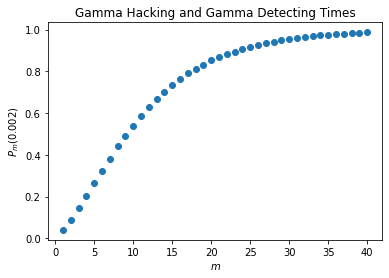

In [5]:
m = 40
eta = 0.02
delta = 0.5
alpha = 0.1
beta = 0.3
t = 0.002
plt.scatter(range(1, m+1), P_mt1(t, range(1, m+1), eta, delta, alpha, beta))
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(0.002)$')
plt.title('Gamma Hacking and Gamma Detecting Times')
plt.show()

## 3D